#### **Project Title:**  ***"Disease Prediction Using Patient Data"***
##### **Dataset:** *"Heart Disease Dataset"*
##### **Step 01:** Loading Important Libraries

In [30]:
#Importing important libraries.
#For data manipulation.
import pandas as pd  
#For numerical operations.
import numpy as np  
#For handling missing values.
from sklearn.impute import SimpleImputer 
#For scaling and encoding.
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder  
#For plotting.
import matplotlib.pyplot as plt 
#Enabling inline plotting for Jupyter Notebook.
%matplotlib inline 
#For advanced visualizations.
import seaborn as sns  
#Importing train-test split function to split the dataset into training and testing subsets.
from sklearn.model_selection import train_test_split
#Importing StandardScaler to standardize the dataset.
from sklearn.preprocessing import StandardScaler
#Importing LogisticRegression for implementing logistic regression model.
from sklearn.linear_model import LogisticRegression
#Importing RandomForestClassifier to implement the Random Forest algorithm.
from sklearn.ensemble import RandomForestClassifier
#Importing SVC for implementing the Support Vector Machine algorithm.
from sklearn.svm import SVC
#Importing performance metrics for model evaluation.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

##### **Step 02:** Loading Dataset

In [31]:
#Loading the heart_disease dataset.
data = pd.read_csv("heart_disease_dataset.csv")
#Displaying the first few rows of the heart_disease dataset to understand its structure.
print("First five rows of heart disease dataset:\n", data.head())
#Checking for missing values in the heart_disease dataset.
print("Missing values in heart disease dataset:\n",data.isnull().sum())

First five rows of heart disease dataset:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
Missing values in heart disease dataset:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


##### **Step 03:** Handling Missing Values

In [32]:
#Handling missing values by imputing the mean for numerical columns.
#Selecting numerical columns for imputation.
data_numeric = data.select_dtypes(include=['float64', 'int64'])
#Using SimpleImputer to fill missing values with the column mean.
imputer = SimpleImputer(strategy='mean')
data[data_numeric.columns] = imputer.fit_transform(data_numeric)
#Verifying that missing values are handled.
print("Heart disease dataset after handling missing values: \n",data.isnull().sum())

Heart disease dataset after handling missing values: 
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


##### **Step 04:** Normalizing Numerical Features

In [33]:
#Normalizing numerical features to scale them between 0 and 1.
scaler = MinMaxScaler()
#Applying Min-Max scaling to all numerical columns of heart_disease dataset.
data[data_numeric.columns] = scaler.fit_transform(data_numeric)
#Displaying the heart_disease dataset after normalization.
print("Heart disease dataset after normalization: \n", data.head())

Heart disease dataset after normalization: 
         age  sex   cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.479167  1.0  0.0  0.292453  0.196347  0.0      0.5  0.740458    0.0   
1  0.500000  1.0  0.0  0.433962  0.175799  1.0      0.0  0.641221    1.0   
2  0.854167  1.0  0.0  0.481132  0.109589  0.0      0.5  0.412214    1.0   
3  0.666667  1.0  0.0  0.509434  0.175799  0.0      0.5  0.687023    0.0   
4  0.687500  0.0  0.0  0.415094  0.383562  1.0      0.5  0.267176    0.0   

    oldpeak  slope    ca      thal  target  
0  0.161290    1.0  0.50  1.000000     0.0  
1  0.500000    0.0  0.00  1.000000     0.0  
2  0.419355    0.0  0.00  1.000000     0.0  
3  0.000000    1.0  0.25  1.000000     0.0  
4  0.306452    0.5  0.75  0.666667     0.0  


##### **Step 05:** Encoding Categorical Features

In [34]:
#Identifying categorical columns in the heart_disease dataset.
categorical_cols = data.select_dtypes(include=['object']).columns
#Checking if there are any categorical columns to encode.
if len(categorical_cols) > 0:
    #Applying One-Hot encoding to categorical columns.
    encoder = OneHotEncoder(sparse=False, drop='first')  
    encoded_features = encoder.fit_transform(data[categorical_cols])
    #Converting encoded features to a dataframe.
    encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))
    #Merging the encoded dataframe with the original data and drop the original categorical columns.
    data = pd.concat([data.reset_index(drop=True), encoded_df], axis=1).drop(columns=categorical_cols)
#Displaying the heart_disease dataset after encoding.
print("Heart disease dataset after encoding categorical features: \n",data.head())

Heart disease dataset after encoding categorical features: 
         age  sex   cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.479167  1.0  0.0  0.292453  0.196347  0.0      0.5  0.740458    0.0   
1  0.500000  1.0  0.0  0.433962  0.175799  1.0      0.0  0.641221    1.0   
2  0.854167  1.0  0.0  0.481132  0.109589  0.0      0.5  0.412214    1.0   
3  0.666667  1.0  0.0  0.509434  0.175799  0.0      0.5  0.687023    0.0   
4  0.687500  0.0  0.0  0.415094  0.383562  1.0      0.5  0.267176    0.0   

    oldpeak  slope    ca      thal  target  
0  0.161290    1.0  0.50  1.000000     0.0  
1  0.500000    0.0  0.00  1.000000     0.0  
2  0.419355    0.0  0.00  1.000000     0.0  
3  0.000000    1.0  0.25  1.000000     0.0  
4  0.306452    0.5  0.75  0.666667     0.0  


##### **Step 06:** Exploratory Data Analysis (EDA)
##### **Feature Distributions**
Histograms and density plots help to understand the distribution of numerical features.


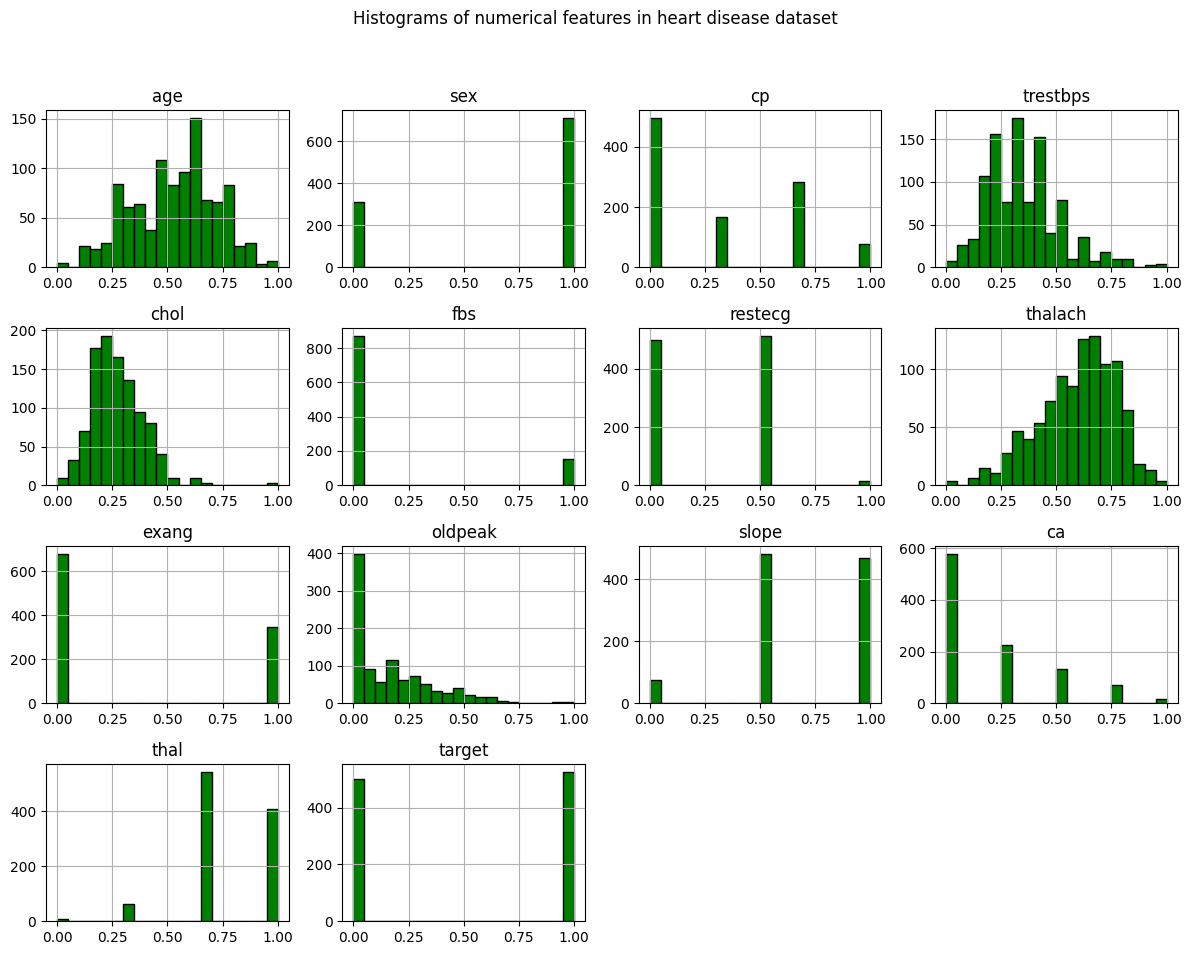

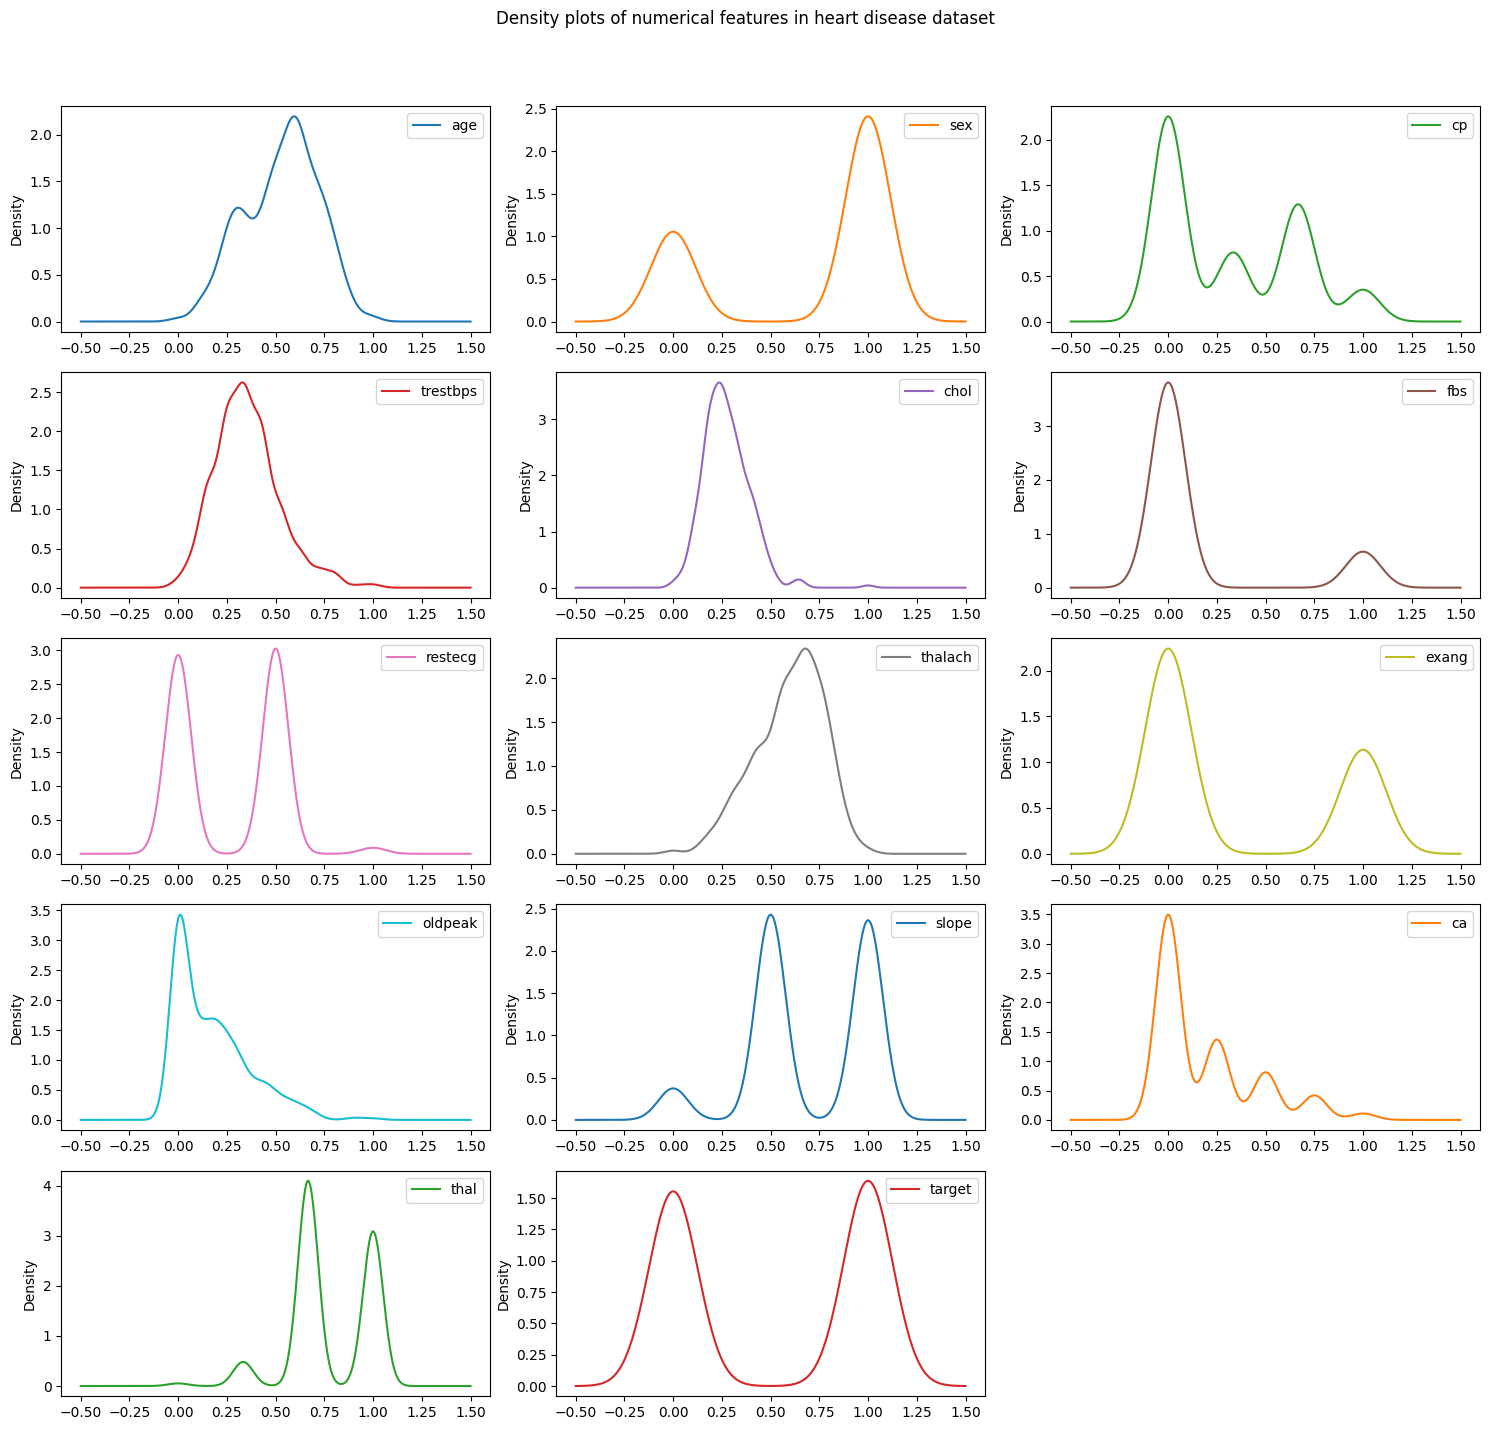

In [35]:
#Plotting histograms for numerical columns in heart_disease dataset.
data.hist(figsize=(12, 10), bins=20, color='green', edgecolor='black')
plt.suptitle("Histograms of numerical features in heart disease dataset")
#Adjusting layout to avoid overlap with title.
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()
#Density plots for numerical features in heart_disease dataset.
data_numeric = data.select_dtypes(include=['float64', 'int64'])
#Dynamically calculate rows and columns for subplots.
num_cols = data_numeric.shape[1]
#Ensuring enough rows for all columns.
rows = (num_cols // 3) + (num_cols % 3 > 0)  
#Generating density plots with dynamic layout.
data_numeric.plot(kind='density',subplots=True,layout=(rows, 3),  sharex=False,figsize=(15, rows * 3))
plt.suptitle("Density plots of numerical features in heart disease dataset")
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()

##### **Feature Correlation**
A heatmap provides a clear visualization of feature relationships.

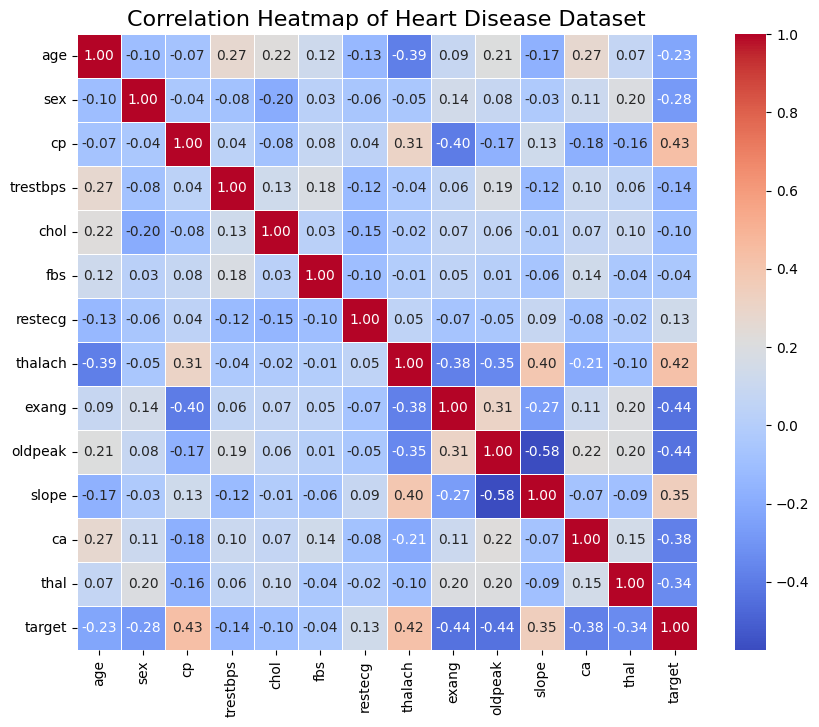

In [36]:
#Computing correlation matrix of heart_disease dataset.
correlation_matrix = data.corr()
#Plotting heatmap of the correlation matrix.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Heart Disease Dataset", fontsize=16)
plt.show()

##### **Scatter Plots**
Scatter plots help analyze pairwise relationships between numerical features.

Columns in the heart disease dataset: 
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


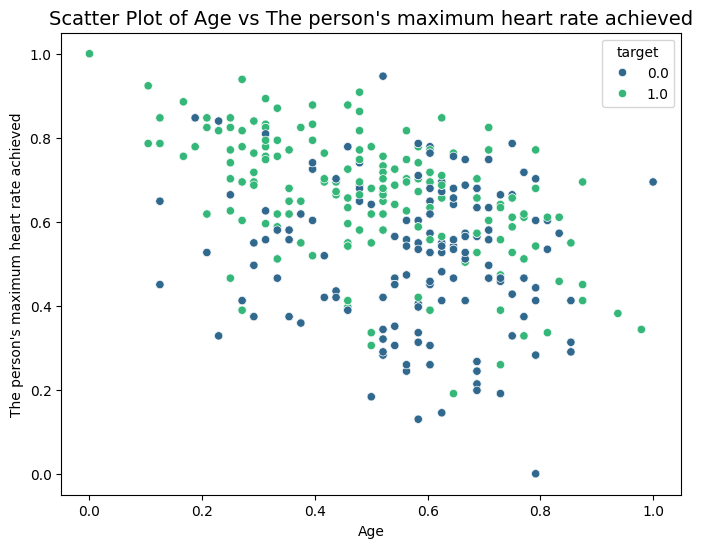

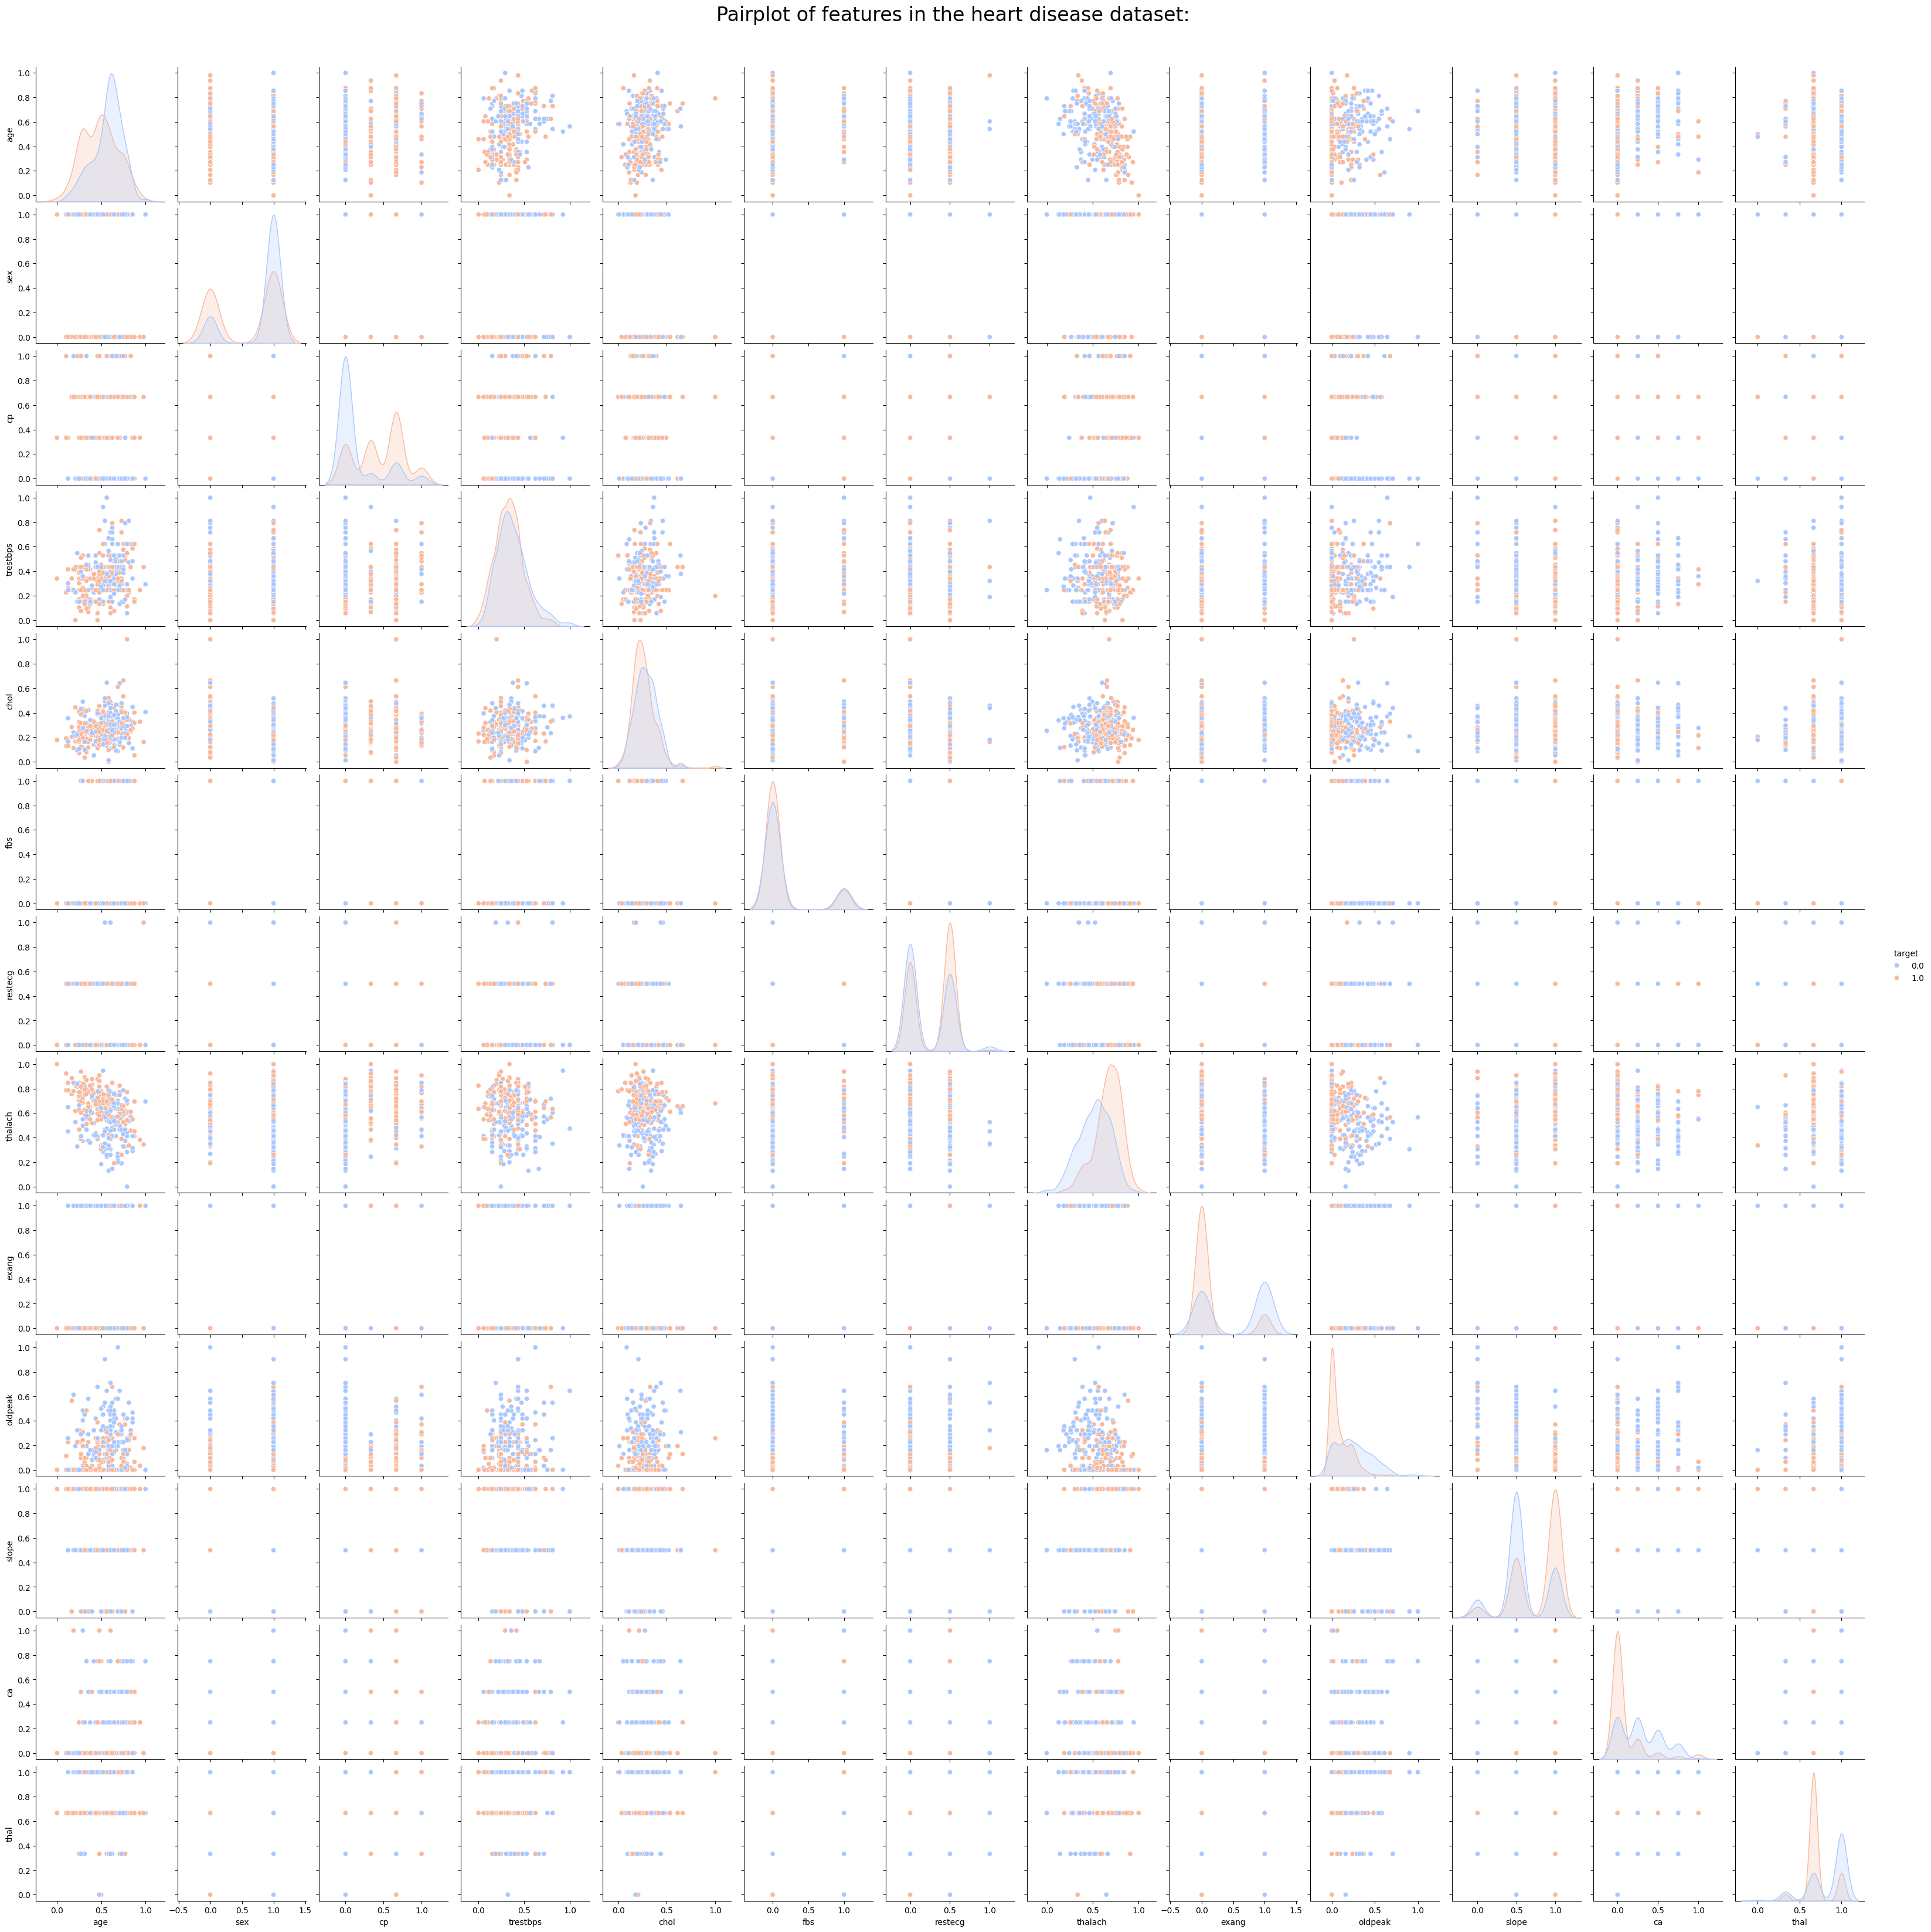

In [37]:
#Checking column names in the heart_disease dataset.
print("Columns in the heart disease dataset: \n", data.columns)
#Scatter plot for 'age' vs 'thalach' in the heart_disease dataset.
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="age", y="thalach", hue="target", palette="viridis") 
plt.title("Scatter Plot of Age vs The person's maximum heart rate achieved", fontsize=14)
plt.xlabel("Age")
plt.ylabel("The person's maximum heart rate achieved")
plt.show()
#Pairplot for an overview of relationships between features in the heart_disease dataset.
sns.pairplot(data, hue="target", diag_kind="kde", palette="coolwarm")
plt.suptitle("Pairplot of features in the heart disease dataset: \n", y=1.02, fontsize=24)
plt.show()

##### **Step 07:** Model Training & Evaluation

In [38]:
#Preparing features (X) and target (y) in heart_disease dataset.
X = data.drop(columns=["target"])  
y = data["target"]
#Splitting data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
#Standardizing the feature set.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#Function to evaluate models.
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"{model_name} Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
    print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1_score": f1_score(y_test, y_pred, average='weighted')
    }
#Training and evaluating Logistic Regression.
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
log_reg_results = evaluate_model(log_reg, X_test_scaled, y_test, "Logistic Regression")
#Training and evaluating Random Forest.
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_results = evaluate_model(rf_clf, X_test, y_test, "Random Forest")
#Training and evaluating Support Vector Machine.
svm_clf = SVC(kernel="linear", probability=True, random_state=42)
svm_clf.fit(X_train_scaled, y_train)
svm_results = evaluate_model(svm_clf, X_test_scaled, y_test, "SVM")

Logistic Regression Results:
Accuracy: 0.82
Precision: 0.82
Recall: 0.82
F1-score: 0.82

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.74      0.80       150
         1.0       0.78      0.89      0.83       158

    accuracy                           0.82       308
   macro avg       0.83      0.82      0.82       308
weighted avg       0.82      0.82      0.82       308

Random Forest Results:
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1-score: 0.99

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       150
         1.0       1.00      0.98      0.99       158

    accuracy                           0.99       308
   macro avg       0.99      0.99      0.99       308
weighted avg       0.99      0.99      0.99       308

SVM Results:
Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1-score: 0.85

Classification Report:
               precision    re

##### **Step 08:** Comparison of Model Performances.

Model Performance Comparison: 
                  Model  Accuracy  Precision    Recall  F1_score
0  Logistic Regression  0.818182   0.824171  0.818182  0.816905
1        Random Forest  0.990260   0.990451  0.990260  0.990261
2                  SVM  0.847403   0.854787  0.847403  0.846244


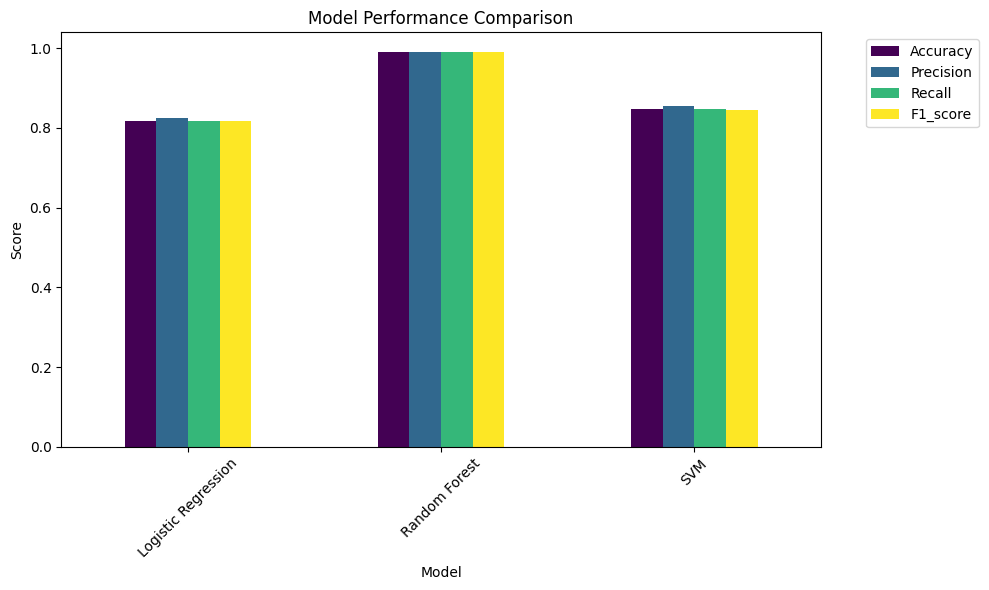

In [39]:
#Comparing model performances.
results_df = pd.DataFrame([log_reg_results, rf_results, svm_results])
print("Model Performance Comparison: \n",results_df)
#Visualizing the comparison.
results_df.set_index("Model", inplace=True)
results_df.plot(kind="bar", figsize=(10, 6), colormap="viridis")
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

##### **Model Performance Comparison**

| Model                | Accuracy  | Precision | Recall    | F1_score  |
|----------------------|-----------|-----------|-----------|-----------|
| Logistic Regression  | 0.818182  | 0.824171  | 0.818182  | 0.816905  |
| Random Forest        | 0.990260  | 0.990451  | 0.990260  | 0.990261  |
| SVM                  | 0.847403  | 0.854787  | 0.847403  | 0.846244  |

#####  **Best-Performing Algorithm**
The **Random Forest** algorithm is the best-performing model as it achieves the highest scores in all metrics:

- **Accuracy**: 0.990260 (highest)
- **Precision**: 0.990451 (highest)
- **Recall**: 0.990260 (highest)
- **F1-score**: 0.990261 (highest)

####  **Heart Disease Analysis Report**
#####  **Objective**
The goal of this analysis was to predict diseases (e.g., heart disease) using patient data by training and evaluating multiple machine learning models.
#####  **Data Preprocessing**
1. **Handling Missing Values**: Missing data was imputed or removed to ensure a complete dataset.
2. **Normalization**: Numerical features were scaled using `StandardScaler` to standardize data for optimal model performance.
3. **Encoding**: Categorical variables were encoded to transform them into numerical representations.
#####  **Exploratory Data Analysis (EDA)**
1. **Feature Distributions**:
   - Histograms and density plots revealed the distribution of numerical features like `age` and `cholesterol`.
2. **Correlations**:
   - A heatmap highlighted significant correlations between features and the target variable.
3. **Visualizations**:
   - Scatter plots and pairplots were used to explore relationships between features.
#####  **Machine Learning Models and Performance**
Three models were trained and evaluated using key metrics:

| Model                | Accuracy  | Precision | Recall    | F1_score  |
|----------------------|-----------|-----------|-----------|-----------|
| Logistic Regression  | 0.818182  | 0.824171  | 0.818182  | 0.816905  |
| Random Forest        | 0.990260  | 0.990451  | 0.990260  | 0.990261  |
| SVM                  | 0.847403  | 0.854787  | 0.847403  | 0.846244  |

#####  **Insights and Findings**
1. **Best-Performing Model**:
   - **Random Forest** emerged as the most effective model, achieving the highest accuracy (99.03%) and excelling across all other metrics.
2. **Logistic Regression**:
   - Performed moderately well but lacked the robustness of Random Forest and SVM.
3. **SVM**:
   - Showed better performance than Logistic Regression but was outperformed by Random Forest.
#####  **Conclusion**
The **Random Forest** classifier is the most suitable algorithm for this dataset, offering high predictive accuracy and balanced performance across precision, recall and F1-score. It is recommended for future predictions on similar datasets.
***